In [2]:
import numpy as np
import cutrk
import matplotlib.pyplot as plt

In [3]:
def get_stats(n):
    f=open(f'mckay/graph{n}.txt', 'r')
    data=[]
    best_M=[]
    max_CE=0
    fewest_E=9999
    while 1:
        line=f.readline()
        if not line:
            break   
        n=int(line.strip())
        M=[]
        for i in range(n):
            line=f.readline()
            M.append(list(map(int, line.strip().split())))
        M=np.array(M)
        E=np.sum(M)//2
        CE=1-cutrk.T(M)/(2**n)
        data.append([E, CE])
        if(CE>max_CE or (CE==max_CE and E<fewest_E)):
            best_M=M.copy()
            max_CE=CE
            fewest_E=E
    f.close()
    data=np.array(data)
    return (data, best_M, max_CE, fewest_E)

In [4]:
stats5=get_stats(5)

In [5]:
stats6=get_stats(6)

In [6]:
stats7=get_stats(7)

In [7]:
stats8=get_stats(8)

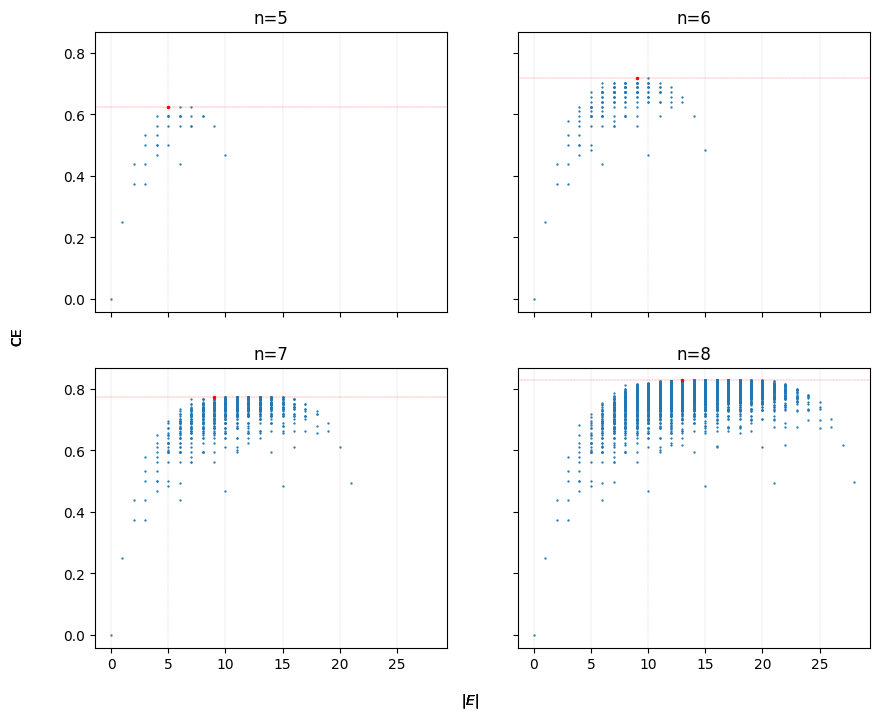

In [8]:
stats=[stats5,stats6,stats7,stats8]
n_arr=[5,6,7,8]
fig, axes=plt.subplots(2,2,sharex=True, sharey=True,figsize=(10,8))
for i in range(len(n_arr)):
    (data, best_M, max_CE, fewest_E)=stats[i]
    ax=axes[i//2, i%2]
    ax.plot(data[:,0], data[:,1], '.', ms=1.3)
    ax.plot([fewest_E], [max_CE], 'r.', ms=3)
    n=n_arr[i]
    e_arr=np.array(list(range(n*(n-1)//2+1)))
    #ax.plot(e_arr, 1-(3/4)**e_arr, 'k--', lw=0.3)
    #ax.plot(e_arr[-5:], 1-(2**(-1)+1/2**n)+(1-(15/16)**(n*(n-1)/2-e_arr[-5:])), 'k--', lw=0.3)
    ax.grid(axis = 'x', lw=0.2, ls='--')
    ax.axhline(y=max_CE, color='r', linestyle='--', linewidth=0.2)
    ax.set_title(f'n={n_arr[i]}')
    fig.text(0.5, 0.04, r'$|E|$', ha='center')
    fig.text(0.04, 0.5, 'CE', va='center', rotation='vertical')